<a href="https://colab.research.google.com/github/wiiloebis/bangkit_machine_learning_assigment/blob/master/Winni_Face_Recognizer_Pins_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Presetup

# Download pre-trained FaceNet model
! wget https://github.com/D2KLab/Face-Celebrity-Recognition/raw/master/model/facenet_keras.h5

# install mtcnn
! pip install mtcnn

# to split folder into train/val dataset
! pip install split-folders

--2020-06-15 15:23:12--  https://github.com/D2KLab/Face-Celebrity-Recognition/raw/master/model/facenet_keras.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/D2KLab/Face-Celebrity-Recognition/master/model/facenet_keras.h5 [following]
--2020-06-15 15:23:13--  https://raw.githubusercontent.com/D2KLab/Face-Celebrity-Recognition/master/model/facenet_keras.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92397640 (88M) [application/octet-stream]
Saving to: ‘facenet_keras.h5’

facenet_keras.h5    100%[===================>]  88.12M  24.2MB/s    in 4.0s    

2020-06-15 15:23:22 (22.2 MB/s) - ‘facenet_ker

In [ ]:
# download the dataset
# preparing kaggle environment to download the dataset, please see https://www.kaggle.com/general/74235
! pip install -q kaggle
from google.colab import files
files.upload() # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"winniseptiani","key":"805a0b70529185cca7c56d880e4bd576"}'}

In [ ]:
# Download and split the dataset into train/val dataset

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d hereisburak/pins-face-recognition
! unzip pins-face-recognition.zip

import split_folders
collection_dir = 'pins_dataset'
training_examples = 20 # number of pictures, to avoid too long time
validation_examples = 7

split_folders.fixed(input='105_classes_pins_dataset', output=collection_dir, fixed=(training_examples, validation_examples))

In [ ]:
import mtcnn
import numpy as np
from os import listdir
# from PIL import Image
import cv2
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt

In [ ]:
from keras.models import load_model
model = load_model('facenet_keras.h5')
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Create Face Only Dataset

Purpose for this cell is to create a face only dataset from the given dataset, then save all the detected face to faces-only-dataset.npz format

processing dataset_20/val/pins_melissa fumero/ (1 out of 105)...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
>loaded 20 examples for class: pins_melissa fumero
processing dataset_20/val/pins_Mark Ruffalo/ (2 out of 105)...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
>loaded 20 examples for class: pins_Mark Ruffalo
processing dataset_20/val/pins_Sarah Wayne Callies/ (3 out of 105)...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
>loaded 20 examples for class: pins_Sarah Wayne Callies
processing dataset_20/val/pins_Emilia Clarke/ (4 out of 105)...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
>loaded 20 examples for class: pins_Emilia Clarke
processing dataset_20/val/pins_Chris Evans/ (5 out of 105)...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
>loaded 20 examples for class: pins_Chris Evans
processing dataset_20/val/pins_Adriana Lima/ (6 out of 105)...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
>loaded 20 examples for class: pins_Adriana Lima
processing dataset_20/val/pins_Dwayne Johnson/ (7 out of 105)...
0
0
0

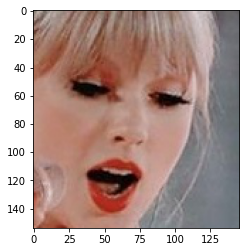

UnboundLocalError: ignored

In [ ]:
def extract_face(filename, required_size=(160,160)):
    detector = MTCNN()
    image = cv2.imread(filename)
    faces = detector.detect_faces(image)

    if len(faces) > 0:
      initialX, initialY, initialWidth, initialHeight = faces[0]['box']
      used_index = 0
      highestWidth = initialX
      highestHeight = initialY
      index = 0
      for face in faces:
      #With Assumption that we're going to close up the targetted person
          x, y, width, height = face['box']
          if width > highestWidth or height > highestHeight :
              used_index = index
              break

          index = index + 1
          
      x1, y1, width, height = faces[used_index]['box']    
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + width, y1 + height
      face_boundary = image[y1:y2, x1:x2]
      face_image = Image.fromarray(face_boundary)
      face_image = face_image.resize(required_size)
      face_array = asarray(face_image)
      # print(used_index)
      return face_image
    else:
      print(f'{filename} face cannot be detected')
      plt.imshow(image)
      plt.show()
    return face_array

def load_faces(directory):
    faces = []
    for filename in os.listdir(directory):
      path = os.path.join(directory, filename)
      face = extract_face(path)
      if face is not None:
        faces.append(face)
    return faces

def load_dataset(directory):
    x, y = [], []
    counter = 1
    for subdir in os.listdir(directory):
      path = os.path.join(directory, subdir + '/') # e.g: train/ben_afflect/
      print(f'processing {path} ({counter} out of {len(os.listdir(directory))})...')
      faces = load_faces(path)
      labels = [subdir for i in range(len(faces))] # assign label to each face
      x.extend(faces)
      y.extend(labels)
      print('>loaded %d examples for class: %s' % (len(faces), subdir))
      counter += 1
    return asarray(x), asarray(y)

train_dir = os.path.join(collection_dir, 'train')
train_X, train_y = load_dataset(train_dir)
print(train_X.shape, train_y.shape)
val_dir = os.path.join(collection_dir, 'val')
val_X, val_y = load_dataset(val_dir)
print(val_X.shape, val_y.shape)
np.savez_compressed('faces-only-dataset.npz', train_X, train_y, val_X, val_y)

## Create Embedding for Each Face

From the face generated earlier, we create an embedding of the face using FaceNet

In [ ]:
import time

data = np.load('faces-only-dataset.npz')
train_X, train_y = data['arr_0'], data['arr_1']
test_X, test_y = data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (train_X.shape[0], test_X.shape[0]))
print('Loaded: ', train_X.shape, train_y.shape, test_X.shape, test_y.shape)

model = load_model('facenet_keras.h5')
print('Loaded Model')

def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis=0)
    y_hat = model.predict(samples) # get the embedding
    return y_hat

start = time.time()
new_train_X = list()
for face_pixels in train_X:
	embedding = get_embedding(model, face_pixels)
	new_train_X.extend(embedding)
 
new_train_X = asarray(new_train_X)
print(new_train_X.shape)

new_test_X = list()
for face_pixels in test_X:
	embedding = get_embedding(model, face_pixels)
	new_test_X.extend(embedding)
new_test_X = asarray(new_test_X)

print(new_test_X.shape)
end = time.time()
print(f'End processing for {end - start} seconds')

np.savez_compressed('faces-embeddings.npz', new_train_X, train_y, new_test_X, test_y)

## Performing Faces Classification

From the embedding, we perform the face classification using SVM model and the embedding as the feature. The target is the face classes (whom the face is)

In [ ]:
data = np.load('faces-embeddings.npz')
train_X, train_y = data['arr_0'], data['arr_1']
test_X, test_y = data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (train_X.shape[0], test_X.shape[0]))

from sklearn.preprocessing import Normalizer, LabelEncoder

in_encoder = Normalizer(norm='l2')
train_X = in_encoder.transform(train_X)
test_X = in_encoder.transform(test_X)

out_encoder = LabelEncoder()
out_encoder.fit(train_y)
train_y = out_encoder.transform(train_y)
test_y = out_encoder.transform(test_y)

from sklearn.svm import SVC
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(train_X, train_y)

from sklearn.metrics import accuracy_score

# predict
yhat_train = model_svm.predict(train_X)
yhat_test = model_svm.predict(test_X)

# score
score_train = accuracy_score(train_y, yhat_train)
score_test = accuracy_score(test_y, yhat_test)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

In [ ]:
def top_10_prediction(prob, labels):
  label_prob = {}
  counter = 0
  for label in labels:
      label_prob[label.replace(' ', '_')] = prob[counter]*100
      counter += 1

  s = sorted(label_prob.items(), key=lambda x: x[1], reverse=True)[:10]
  for k, v in s:
      print(k.replace('pins_', '').replace('_', ' '), f'{v:.2f}')

In [ ]:
# test model on a random example from the test dataset
import random
data = np.load('faces-only-dataset.npz')
test_X_faces = data['arr_2']

selection = random.choice([i for i in range(test_X.shape[0])])
random_face_pixels = test_X_faces[selection]
random_face_emb = test_X[selection]
random_face_class = test_y[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model_svm.predict(samples)
yhat_prob = model_svm.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
plt.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()
top_10_prediction(yhat_prob[0], out_encoder.classes_)

## Export the Model

Export the model to be used in other environment

In [ ]:
from sklearn.externals import joblib 
joblib.dump(model_svm, 'svm_model.pkl')
np.save('face_classes.npy', out_encoder.classes_)